In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_digits

# Dataset

In [2]:
pd.set_option('max_columns',None)

In [3]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
df = pd.DataFrame(digits.data,columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
# we can see some features like  : pixel_0_0, pixel_4_0, pixel_4_7 are useless are they are 0 for every entry

df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,10.382304,11.979410,10.279354,8.175849,1.846411,0.107958,0.002782,2.601558,9.903172,6.992766,7.097941,7.806344,1.788536,0.050083,0.001113,2.469672,9.091263,8.821369,9.927101,7.551475,2.317752,0.002226,0.0,2.339455,7.667223,9.071786,10.301614,8.744018,2.909293,0.0,0.008904,1.583751,6.881469,7.228158,7.672231,8.236505,3.456316,0.027268,0.007234,0.704508,7.506956,9.539232,9.416249,8.758486,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,5.421456,3.977543,4.782681,6.052960,3.586321,0.827915,0.062368,3.576301,5.690767,5.802662,6.175729,6.197322,3.259870,0.438597,0.033352,3.146532,6.192038,5.882936,6.152093,5.872556,3.686456,0.047140,0.0,3.480372,6.324687,6.268391,5.933490,5.870648,3.537283,0.0,0.145185,2.981816,6.537955,6.441378,6.259511,5.695527,4.330951,0.307356,0.204223,1.746153,5.644496,5.226948,5.302048,6.031154,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,9.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,6.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,13.000000,11.000000,9.000000,0.000000,0.000000,0.000000,1.000000,12.000000,6.000000,6.000000,8.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,12.000000,7.000000,0.000000,0.000000,0.0,0.000000,8.000000,10.000000

# Standardization

In [6]:
scaler = StandardScaler()
df2 = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df2.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,0.482974,0.759622,-0.058426,1.127721,0.879583,-0.130433,-0.044625,0.111443,0.895880,-0.860666,-1.149648,0.515472,1.905963,-0.114222,-0.03338,0.486489,0.469885,-1.499901,-1.614063,0.076398,1.541814,-0.047232,0.0,0.764656,0.052630,-1.447630,-1.736664,0.043616,1.439558,0.0,-0.061344,0.810554,0.630117,-1.122457,-1.066232,0.660965,0.818451,-0.088742,-0.035433,0.742119,1.150652,-0.868671,0.110130,0.537611,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,-1.915573,-0.246304,1.196450,0.136195,-0.514991,-0.130433,-0.044625,-0.727646,-1.213385,1.380308,1.441860,-0.291553,-0.548805,-0.114222,-0.03338,1.440185,0.954513,1.220586,0.987402,-0.945588,-0.628896,-0.047232,0.0,-0.672372,-1.054452,1.105570,0.960644,-0.978702,-0.822695,0.0,-0.061344,-0.531284,-0.899839,1.362175,1.330789,-0.392787,-0.798272,-0.088742,-0.035433,-0.403575,-1.153118,1.236394,1.242083,-0.457500,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,-1.362062,1.011104,0.987304,0.962467,-0.514991,-0.130433,-0.044625,-0.727646,-0.334525,1.035543,0.146106,1.322497,-0.548805,-0.114222,-0.03338,-0.785105,-1.307084,-0.479719,0.824811,0.587391,-0.628896,-0.047232,0.0,-0.384967,0.052630,0.626845,0.792062,-1.319475,-0.822695,0.0,-0.061344,2.487851,1.395095,1.362175,-0.427026,-1.446538,-0.798272,-0.088742,-0.035433,1.314966,0.973439,1.236394,1.242083,0.371759,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,0.482974,-1.503711,0.987304,-0.690077,-0.514991,-0.130433,-0.044625,-0.168254,-1.564930,1.035543,0.955952,-1.259982,-0.548805,-0.114222,-0.03338,-0.785105,-1.145542,1.050555,0.174444,-1.115919,-0.628896,-0.047232,0.0,-0.672372,-1.212607,-1.288055,0.286317,0.554775,-0.539913,0.0,-0.061344,-0.531284,-1.052835,-1.122457,-1.066232,0.309714,1.049411,-0.088742,-0.035433,-0.403575,0.087374,-1.060040,-0.833165,0.869315,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,-1.915573,-1.252229,-0.476718,-1.351095,-0.514991,-0.130433,-0.044625,-0.727646,-1.564930,1.035543,-0.177833,-0.937173,0.064887,-0.114222,-0.03338,-0.785105,-0.337828,1.050555,-1.614063,0.246729,1.541814,-0.047232,0.0,0.764656,1.317867,0.148120,-1.736664,1.236320,0.873995,0.0,-0.061344,0.810554,1.242100,1.362175,0.851385,1.363466,-0.567312,-0.088742,-0.035433,-0.403575,-1.330331,-1.251410,1.053424,0.205907,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008


# Logistic Regression without PCA

In [7]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(df2,digits.target, train_size=0.8, random_state=25)

In [8]:
model_01 = LogisticRegression(max_iter=1000)
model_01.fit(x_train, y_train)
model_01.score(x_test,y_test)

0.9694444444444444

# PCA with 95% Information

In [9]:
from sklearn.decomposition import PCA

In [10]:
# PCA preserving 95% data

pca_01 = PCA(n_components=0.95)
components = pca_01.fit_transform(df2)
components

array([[ 1.91421366, -0.95450157, -3.94603482, ...,  0.81405925,
         0.0249306 ,  0.32193146],
       [ 0.58898033,  0.9246358 ,  3.92475494, ...,  0.20026094,
         0.08710843, -0.48914299],
       [ 1.30203906, -0.31718883,  3.02333293, ..., -0.214596  ,
        -1.2788745 ,  0.54583387],
       ...,
       [ 1.02259599, -0.14791087,  2.46997365, ...,  0.60136463,
         0.41238798,  1.20886377],
       [ 1.07605522, -0.38090625, -2.45548693, ...,  0.43756556,
        -0.69863483, -0.44339963],
       [-1.25770233, -2.22759088,  0.28362789, ..., -0.38108638,
         0.12855104,  1.32137195]])

In [11]:
#it generated 40 PCA that corresponds to 95% of the total data
# That is a substancial reduction in dimention

pca_01.n_components_

40

In [12]:
# The percentage of variance captured by each PC

pca_01.explained_variance_ratio_*100

array([12.0339161 ,  9.5610544 ,  8.44441489,  6.49840791,  4.86015488,
        4.21411987,  3.9420828 ,  3.38938092,  2.99822101,  2.93200255,
        2.78180546,  2.57705509,  2.27530332,  2.22717974,  2.16522943,
        1.91416661,  1.77554709,  1.63806927,  1.59646017,  1.48919119,
        1.34796957,  1.27193137,  1.16583735,  1.0576466 ,  0.97531595,
        0.94455899,  0.86301383,  0.83664285,  0.79769325,  0.74647137,
        0.72558215,  0.69191125,  0.65390854,  0.64079257,  0.59138411,
        0.57116241,  0.5236368 ,  0.48180759,  0.45371926,  0.42316275])

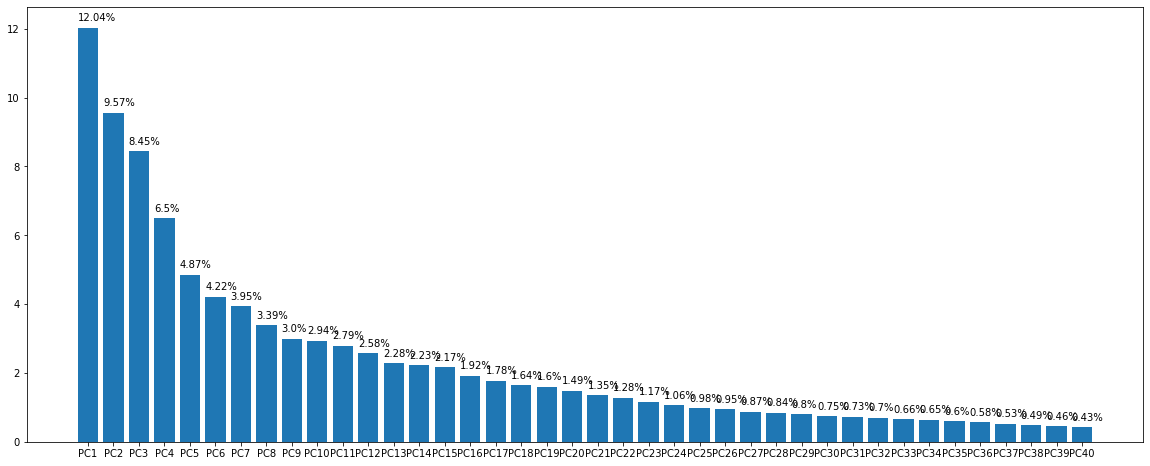

In [13]:
# The percentage of variance captured by each PC, barplot

plt.figure(figsize=(20,8))
graph = plt.bar(['PC'+str(i+1) for i in range(components.shape[1])],pca_01.explained_variance_ratio_*100)
for g in graph:
    height = g.get_height()
    width = g.get_width()    
    x,y = g.get_xy()
    plt.text(x,height+0.2,str(math.ceil(height*100)/100)+'%')

In [14]:
df3 = pd.DataFrame(components, columns=['PC'+str(i+1) for i in range(components.shape[1])])
df3.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,1.914214,-0.954502,-3.946035,2.028723,-0.267173,0.530327,-1.415321,1.496062,0.124914,-0.822246,-0.499693,-0.789466,0.228125,-0.195142,0.837040,0.104341,0.185323,-0.090057,0.412754,0.430517,0.450994,0.558703,0.508826,-0.758896,-0.464500,0.732176,0.327318,0.157022,0.404918,-0.324594,0.534683,-0.017979,0.047950,0.019124,0.117190,0.709049,0.082410,0.814059,0.024931,0.321931
1,0.588980,0.924636,3.924755,-1.779850,-0.993430,-0.675652,1.878565,0.556336,1.079877,0.087451,-0.505000,0.641593,-0.048361,-0.392054,-0.744412,-0.214072,-0.101727,-0.422000,0.553085,-0.069676,0.909818,-0.242434,-0.478472,0.491158,0.790504,0.067788,-1.525555,-0.742482,-0.855856,-0.277084,1.098196,-1.144159,0.037744,0.371680,-0.671299,-0.004144,-0.246765,0.200261,0.087108,-0.489143
2,1.302039,-0.317189,3.023333,-2.043376,-2.081155,0.935121,-1.296200,1.156160,0.785606,-1.099206,2.196453,-2.310276,-0.566874,-0.995772,-1.170505,0.399017,-0.240298,-0.465223,-1.065556,-1.133454,-0.525917,0.069262,-1.276142,-0.389437,-0.407580,-0.121614,0.373418,0.205099,-0.362138,1.181186,-0.749792,0.487304,-1.356959,-0.107016,0.149503,-0.089290,0.408216,-0.214596,-1.278875,0.545834
3,-3.020770,-0.868772,-0.801744,-2.187039,-0.556813,0.727124,0.959766,-1.382638,0.259075,0.744555,-1.065129,0.491755,-0.166579,1.008790,-0.141893,-1.000781,-0.950687,-0.400034,1.490825,0.308128,0.560421,-0.167976,0.573332,-0.532997,-0.084318,-0.466793,0.154232,-0.403244,0.291934,-1.244539,0.268599,0.875580,0.117581,-0.470575,-0.148854,0.234044,0.396726,0.197436,0.772751,-0.050325
4,4.528949,-1.093480,0.973121,-1.419510,-1.715106,1.431592,1.073649,-0.968240,-1.660216,1.174593,-1.017440,-1.365994,-0.343716,-0.113469,0.732635,0.210692,-0.094411,-0.552371,1.613976,1.086368,0.495644,-0.185698,0.960864,-0.184642,0.563999,-2.142481,0.064456,0.746668,1.076306,0.297665,-0.660454,-0.360253,0.268121,0.499444,-0.263106,-0.583008,-0.174328,-0.215579,-0.133426,0.184994


In [15]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(df3,digits.target, train_size=0.8, random_state=25)

In [16]:
# We had a tradeoff of accuracy but our dimentions are less and computation are faster

model_02 = LogisticRegression(max_iter=1000)
model_02.fit(x_train, y_train)
model_02.score(x_test,y_test)

0.9583333333333334

# Taking Only First two PCA

In [17]:
pca_02 = PCA(n_components=2)
components = pca_02.fit_transform(df2)

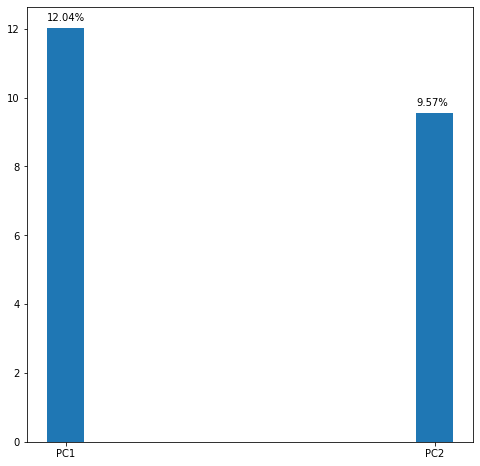

In [18]:
# The percentage of variance captured by each PC, barplot

plt.figure(figsize=(8,8))
graph = plt.bar(['PC'+str(i+1) for i in range(components.shape[1])],pca_02.explained_variance_ratio_*100, width=0.1)
for g in graph:
    height = g.get_height()
    width = g.get_width()    
    x,y = g.get_xy()
    plt.text(x,height+0.2,str(math.ceil(height*100)/100)+'%')

In [19]:
# Both PC1 and PC2 combined capture only 21% varience, so they are bound to give less accuracy

df4 = pd.DataFrame(components, columns=['PC'+str(i+1) for i in range(components.shape[1])])
df4.head()

,PC1,PC2
0,1.914219,-0.954524
1,0.588976,0.924658
2,1.302107,-0.317323
3,-3.020797,-0.868712
4,4.528943,-1.093480


In [20]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(df4,digits.target, train_size=0.8, random_state=25)

In [21]:
# We had a tradeoff of accuracy but our dimentions are less and computation are faster

model_02 = LogisticRegression(max_iter=1000)
model_02.fit(x_train, y_train)
model_02.score(x_test,y_test)

0.5472222222222223